## DJIA Stock Time Series Analysis ##
By: Sureet Sarau, Erik Martin, Ishraq Rahman

### Data ###
We will be using the [DJIA 30 Stock Time Series Dataset](https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231/data?select=all_stocks_2006-01-01_to_2018-01-01.csv) from Kaggle.

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

### Data Cleaning and Exploration ###

Retrieve stock data from Apple (AAPL), Amazon (AMZN), Google (GOOGL), and IBM (IBM), Microsoft (MSFT).

In [ ]:
# Initialize
output_file = "data/tech_stocks.csv"
tech_stock_codes = ['AAPL', 'AMZN', 'GOOGL', 'IBM', 'MSFT']

# Read in all stocks
all_stocks = pd.read_csv("data/all_stocks_2006-01-01_to_2018-01-01.csv")

# Filter for relevant stocks and save to a file
tech_stocks = all_stocks[all_stocks['Name'].isin(tech_stock_codes)]
tech_stocks.to_csv(output_file, index=False)


### Load and Transform Data ###

In [29]:
# Read in file
tech_df = pd.read_csv("data/tech_stocks_saved.csv")
# Filter out unneeded features
tech_df = tech_df.drop(columns=["Open", "High", "Low", "Volume"])
# Set Date as datetime
tech_df["Date"] = pd.to_datetime(tech_df["Date"])
# Pivot
tech_df = tech_df.pivot(index="Date", columns="Name", values="Close")
# Drop NaN values
tech_df = tech_df.dropna()
# Check dataframe
tech_df


Name,AAPL,AMZN,GOOGL,IBM,MSFT
Date,,,,,
2006-01-03,10.68,47.58,217.83,82.06,26.84
2006-01-04,10.71,47.25,222.84,81.95,26.97
2006-01-05,10.63,47.65,225.85,82.50,26.99
2006-01-06,10.90,47.87,233.06,84.95,26.91
2006-01-09,10.86,47.08,233.68,83.73,26.86
...,...,...,...,...,...
2017-12-22,175.01,1168.36,1068.86,152.50,85.51
2017-12-26,170.57,1176.76,1065.85,152.83,85.40
2017-12-27,170.60,1182.26,1060.20,153.13,85.71


### Data Visualization ###

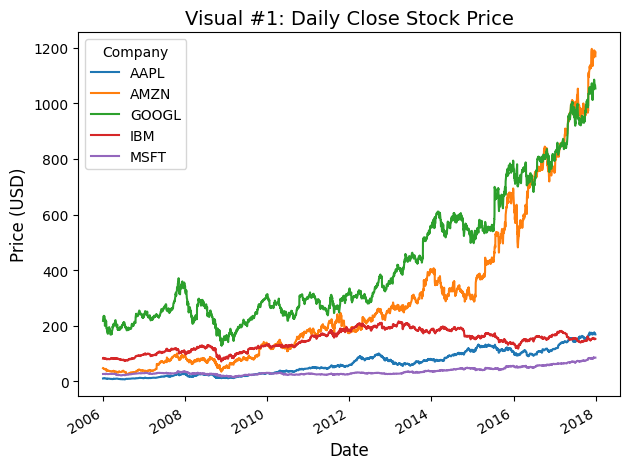

In [30]:
tech_df.plot(ax=plt.gca())
plt.title("Visual #1: Daily Close Stock Price", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(title="Company", fontsize=10)
plt.tight_layout()
plt.show()

## Analysis: Time Series Similarity - Ishraq ##

### Gather Seasonality Components ###

In [ ]:
def seasonality_decomp(df, model="additive"):
    """Helper function to extract additive seasonality of each tech stock"""
    # Normalize to weekly bins
    weekly = df.resample("W").mean()
    # Iterate through each company
    for company in weekly.columns:
        # Calculate additive seasonal decomposition for annual period
        result = seasonal_decompose(weekly[company], model=model, period=52)
        weekly[company] = result.seasonal
    return weekly

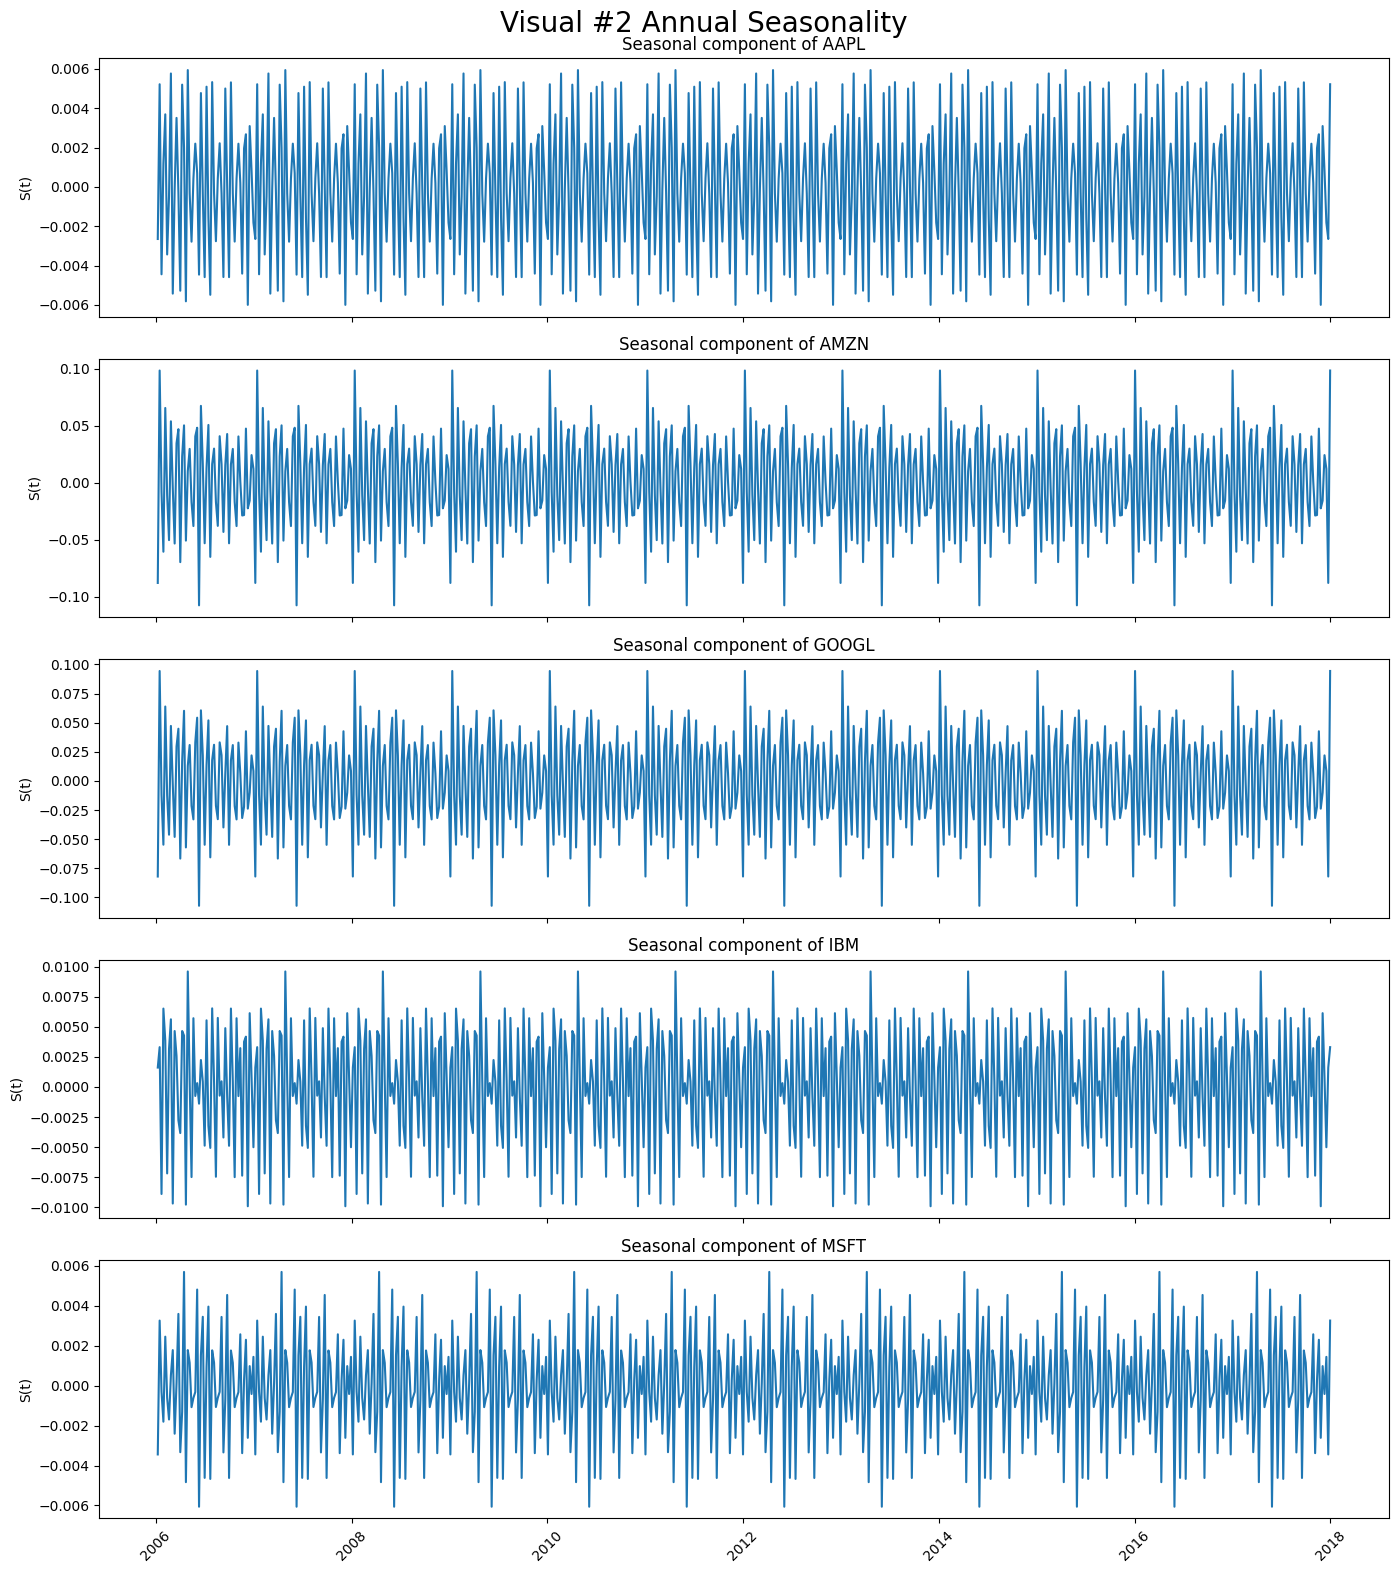

In [ ]:
copy_df = tech_df.copy()
seasonal_df = seasonality_decomp(tech_df)

fig, axs = plt.subplots(5, 1, figsize=(14, 16), sharex=True)
fig.suptitle("Visual #2: Annual Seasonality", fontsize=20)

for ax, stock in zip(axs, seasonal_df.columns):
    ax.plot(seasonal_df.index, seasonal_df[stock])
    ax.set_title(f"Seasonal component of {stock}")
    ax.set_ylabel("S(t)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis: Forecasting - Ricky ###